<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/VAE/vae_exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selfies

https://github.com/aspuru-guzik-group/selfies

https://colab.research.google.com/github/mert-kurttutan/torchview/blob/main/docs/docs/tutorial/notebook/example_introduction.ipynb

https://appsilon.com/visualize-pytorch-neural-networks/

https://github.com/Ishan-Kumar2/Molecular_VAE_Pytorch



In [3]:
import selfies as sf
dataset = ["[C][O][C]", "[F][C][F]", "[O][=O]", "[C][C][O][C][C]"]
alphabet = sf.get_alphabet_from_selfies(dataset)
alphabet.add("[nop]")  # [nop] is a special padding symbol
alphabet = list(sorted(alphabet))  # ['[=O]', '[C]', '[F]', '[O]', '[nop]']

pad_to_len = max(sf.len_selfies(s) for s in dataset)  # 5
print('max len of drug in dataset: ', pad_to_len)
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}

dimethyl_ether = dataset[0]  # [C][O][C]

label, one_hot = sf.selfies_to_encoding(
   selfies=dimethyl_ether,
   vocab_stoi=symbol_to_idx,
   pad_to_len=pad_to_len,
   enc_type="both"
)

max len of drug in dataset:  5


In [4]:
! pip install -q torchview --quiet
! pip install -q -U graphviz --quiet

In [5]:
from torchview import draw_graph
from torch import nn
import torch
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'svg'

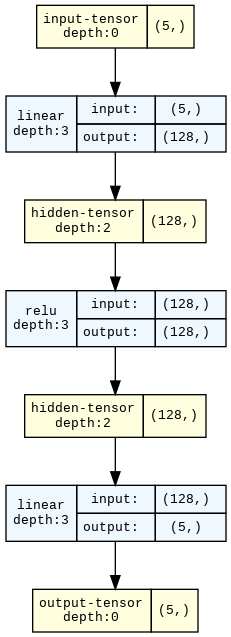

In [12]:
class MLP(nn.Module):
    """Multi Layer Perceptron with inplace option.
    Make sure inplace=true and false has the same visual graph"""
    def __init__(self, in_dim, out_dim, inplace: bool = True) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(inplace),
            nn.Linear(128, out_dim),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layers(x)
        return x

model_graph_1 = draw_graph(
    MLP(pad_to_len, pad_to_len, True), input_size=(pad_to_len, ),
    graph_name='MLP',
    hide_inner_tensors=False,
    hide_module_functions=False,
)
model_graph_1.visual_graph